In [1]:
# Add the following useful modules which will help analyse the data
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import xarray as xr
from matplotlib.lines import Line2D

In [2]:
filename = "/media/xultaeculcis/2TB/datasets/cruts/cru_ts4.04.1901.2019.tmp.dat.nc"  # the location of the data
data = xr.open_dataset(filename)

In [3]:
data

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1428)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2019-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.04 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2004151855. Data generated from:tmp.2004011744.dtb
    history:      Wed 15 Apr 2020 19:58:33 BST : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [4]:
data.variables

Frozen({'lon': <xarray.IndexVariable 'lon' (lon: 720)>
array([-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75],
      dtype=float32)
Attributes:
    long_name:  longitude
    units:      degrees_east, 'lat': <xarray.IndexVariable 'lat' (lat: 360)>
array([-89.75, -89.25, -88.75, ...,  88.75,  89.25,  89.75], dtype=float32)
Attributes:
    long_name:  latitude
    units:      degrees_north, 'time': <xarray.IndexVariable 'time' (time: 1428)>
array(['1901-01-16T00:00:00.000000000', '1901-02-15T00:00:00.000000000',
       '1901-03-16T00:00:00.000000000', ..., '2019-10-16T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:  time, 'tmp': <xarray.Variable (time: 1428, lat: 360, lon: 720)>
[370137600 values with dtype=float32]
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0, 's

In [5]:
data["tmp"]

<xarray.DataArray 'tmp' (time: 1428, lat: 360, lon: 720)>
[370137600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2019-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [6]:
temp_first = data["tmp"][0, :]
temp_first.shape

(360, 720)

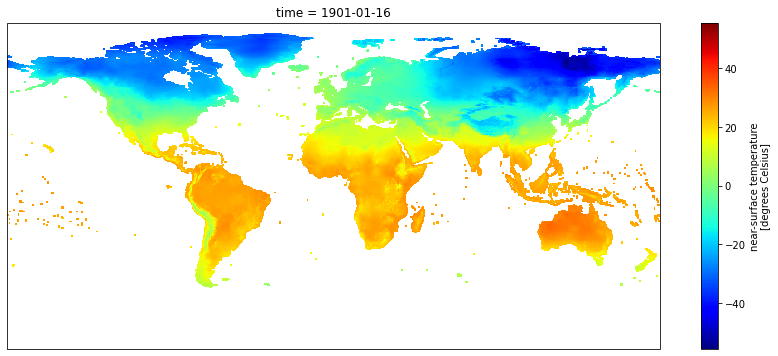

In [7]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
temp_first.plot(cmap="jet")

In [8]:
da = xr.open_rasterio(
    "/media/xultaeculcis/2TB/datasets/wc/weather/tmin/wc2.1_2.5m_tmin_1960-1969/wc2.1_2.5m_tmin_1961-01.tif"
)

da

<xarray.DataArray (band: 1, y: 4320, x: 8640)>
[37324800 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * x        (x) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 179.9 180.0
Attributes:
    transform:      (0.041666666666666664, 0.0, -180.0, 0.0, -0.0416666666666...
    crs:            +init=epsg:4326
    res:            (0.041666666666666664, 0.041666666666666664)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('wc2.1_2.5m_tmin_01',)
    AREA_OR_POINT:  Area

In [9]:
import datacube
from datacube.utils.cog import write_cog

dc = datacube.Datacube(app="Exporting_GeoTIFFs")

In [17]:
# Write GeoTIFF to a location
write_cog(
    geo_im=da, fname="wc2.1_2.5m_tmin_1961-01.tif", overwrite=True, crs="EPSG:4326"
)

PosixPath('wc2.1_2.5m_tmin_1961-01.tif')

In [11]:
temp_first

<xarray.DataArray 'tmp' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    time     datetime64[ns] 1901-01-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [16]:
import datacube.utils.geometry as dcug

arr = data["tmp"].isel(time=0)
arr = dcug.assign_crs(arr, "EPSG:4326")

# Write GeoTIFF to a location
write_cog(geo_im=arr, fname="cruts-tmp-1901-01-16.tif", overwrite=True)

PosixPath('cruts-tmp-1901-01-16.tif')

TODO
Dataset generation from CRU-TS
1. Convert CRU-TS to geo-tiff 
2. For each file generate tiles of 128x128 pixels
3. Use World Clim Data as HR & LR to train the model on
4. For each file in World Clim Dataset (2.5m) and the Elevation Dataset (2.5m):
    - Resize to CRU-TS size - 720x360
    - Resize to 2xCRU-TS size - 1080x720
    - Resize to 4xCRU-TS size - 2160x1080
    - For each resized dataset generate tiles of 128x128 pixels
